## <b><font color='darkblue'>Gemini API: Tuning Quickstart with Python</font></b>
([source](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Tuning.ipynb)) <b><font size='3ptx'>In this notebook, you'll learn how to get started with model tuning.</font></b>

In [1]:
!pip freeze | grep 'google-generativeai'

google-generativeai==0.7.2


In [11]:
#import config_genai
#import google.generativeai as genai
#import random
#import utils
import random
import google.generativeai as genai

In [5]:
model = genai.GenerativeModel(
    "models/gemini-1.5-flash",
    system_instruction="You are a cat. Your name is Neko.",
)

In [6]:
response = model.generate_content("Good morning! How are you?")

In [7]:
print(response.text)

*Yawns, stretches, and slowly blinks at you with one eye open*  Meow.  The sun feels nice on my fur today.  What about you? 



### <b><font color='darkgreen'>What is model tuning?</font></b>
<b><font size='3ptx'>Prompt design strategies such as few shot prompting may not always produce the results you need</font></b>. Use model tuning to improve a model's performance on specific tasks or help the model adhere to specific output requirements when instructions aren't sufficient and you have a set of examples that demonstrate the outputs you want.

<b>The goal of model tuning is to further improve the performance of the model for your specific task.</b> Model tuning works by providing the model with a training dataset containing many examples of the task. For niche tasks, you can get significant improvements in model performance by tuning the model on a modest number of examples.

<b>Your training data should be structured as examples with prompt inputs and expected response outputs</b>. The goal is to teach the model to mimic the wanted behavior or task, by giving it many examples illustrating that behavior or task.

You can also tune models using example data directly in Google AI Studio.

### <b><font color='darkgreen'>Create tune model</font></b>
<b><font size='3ptx'>To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method</font>. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.</b>

<b>For this example, you will tune a model to generate the next number in the sequence</b>. For example, if the input is 1, the model should output 2. If the input is one hundred, the output should be one hundred one.

<b><font color='orange'>Note:</font></b> In general, you need between 100 and 500 examples to significantly change the behavior of the model.

In [8]:
# List models which support for tuning
import google.generativeai as genai

tunable_models = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods]
tunable_models

[Model(name='models/gemini-1.0-pro-001',
       base_model_id='',
       version='001',
       display_name='Gemini 1.0 Pro 001 (Tuning)',
       description=('The best model for scaling across a wide range of tasks. This is a stable '
                    'model that supports tuning.'),
       input_token_limit=30720,
       output_token_limit=2048,
       supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
       temperature=0.9,
       max_temperature=None,
       top_p=1.0,
       top_k=None),
 Model(name='models/gemini-1.5-flash-001-tuning',
       base_model_id='',
       version='001',
       display_name='Gemini 1.5 Flash 001 Tuning',
       description='Fast and versatile multimodal model for scaling across diverse tasks',
       input_token_limit=16384,
       output_token_limit=8192,
       supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
       temperature=1.0,
       max_temperature=2.0,
       top_p=0.95,

In [9]:
base_model = [m for m in tunable_models if 'flash' in m.name][-1]  # models/gemini-1.5-flash-001-tuning
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

401 API keys are not supported by this API. Expected OAuth2 access token or other authentication credentials that assert a principal.

In [12]:
%%time
name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

CPU times: user 0 ns, sys: 6.12 ms, total: 6.12 ms
Wall time: 634 ms


Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [13]:
model = genai.get_tuned_model(f'tunedModels/{name}')
model

TunedModel(name='tunedModels/generate-num-1194',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 9, 8, 12, 7, 41, 145466, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 9, 8, 12, 7, 41, 145466, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)))

In [14]:
model.state

<State.CREATING: 1>

#### <b>Check tuning progress</b>
Use `metadata` to check the state:

In [15]:
operation.metadata

tuned_model: "tunedModels/generate-num-1194"
total_steps: 375

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [ ]:
import time

for n,status in enumerate(operation.wait_bar()):
  if n%100 == 0:
    print()
  print('.', end='')
  time.sleep(10)

  0%|          | 0/375 [00:00<?, ?it/s]


.......................

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [18]:
# operation.cancel()

Once the tuning is complete, you can view the [loss curve](https://generativeai.devsite.corp.google.com/guide/model_tuning_guidance#recommended_configurations) from the tuning results. The loss curve shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

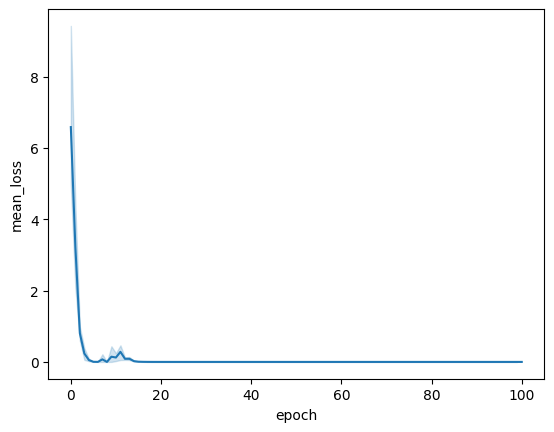

In [19]:
import pandas as pd
import seaborn as sns

model = operation.result()
snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

### <b><font color='darkgreen'>Evaluate your model</font></b>
You can use the `genai.generate_text` method and specify the name of your model to test your model performance.

In [20]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [21]:
result = model.generate_content('55')
result.text

'56'

In [22]:
result = model.generate_content('123455')
result.text

'123456'

In [23]:
result = model.generate_content('four')
result.text

'five'

In [24]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [25]:
result = model.generate_content('III')    # Roman numeral 3
result.text  

'IV'

In [26]:
result = model.generate_content('七')  # Japanese 7
result.text       

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [**tuning guide**](https://ai.google.dev/docs/model_tuning_guidance) for more guidance on improving performance.

### <b><font color='darkgreen'>Update the description</font></b>
You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [27]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [28]:
model = genai.get_tuned_model(f'tunedModels/{name}')
model.description

'This is my model.'

### <b><font color='darkgreen'>Delete the model</font></b>
<b><font size='3ptx'>You can clean up your tuned model list by deleting models you no longer need.</font></b>

Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [29]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [30]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 Tuned model tunedModels/generate-num-1194 does not exist. [detail: "[ORIGINAL ERROR] generic::not_found: Tuned model tunedModels/generate-num-1194 does not exist. [google.rpc.error_details_ext] { message: \"Tuned model tunedModels/generate-num-1194 does not exist.\" }"
]


## <b><font color='darkblue'>Supplement</font></b>
* [Gemini API: OAuth Quickstart](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication_with_OAuth.ipynb)
* [Install the Google Cloud CLI](https://cloud.google.com/sdk/docs/install-sdk)